# Main flow Services and Technology Internship 
## Data Analysis And Data Science with Python
### Task:08
##### Section 1: Feature Engineering & Model Tuning
##### Section 2: Fraud Detection with Decision Trees

### Section 1: Feature Engineering & Model Tuning
##### Student Pass/Fail Prediction¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\HP\\Downloads\\student_performance.xls")
df.head()

,student_id,study_hr,math_score,English_score,science_score,reading_score,pass_fail
0,STUD_1,6,35,74,65,65,Fail
1,STUD_2,3,67,58,99,78,Pass
2,STUD_3,10,77,20,77,85,Fail
3,STUD_4,7,40,53,15,73,Fail
4,STUD_5,4,88,74,82,81,Pass


In [3]:
# Convert target variable to binary
df['pass_fail'] = df['pass_fail'].map({'Pass': 1, 'Fail': 0})

In [5]:
# Select relevant columns
df = df[['study_hr', 'math_score','English_score','science_score','reading_score','pass_fail']]

In [6]:
# Check for missing values
df.dropna(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10520\4263254367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


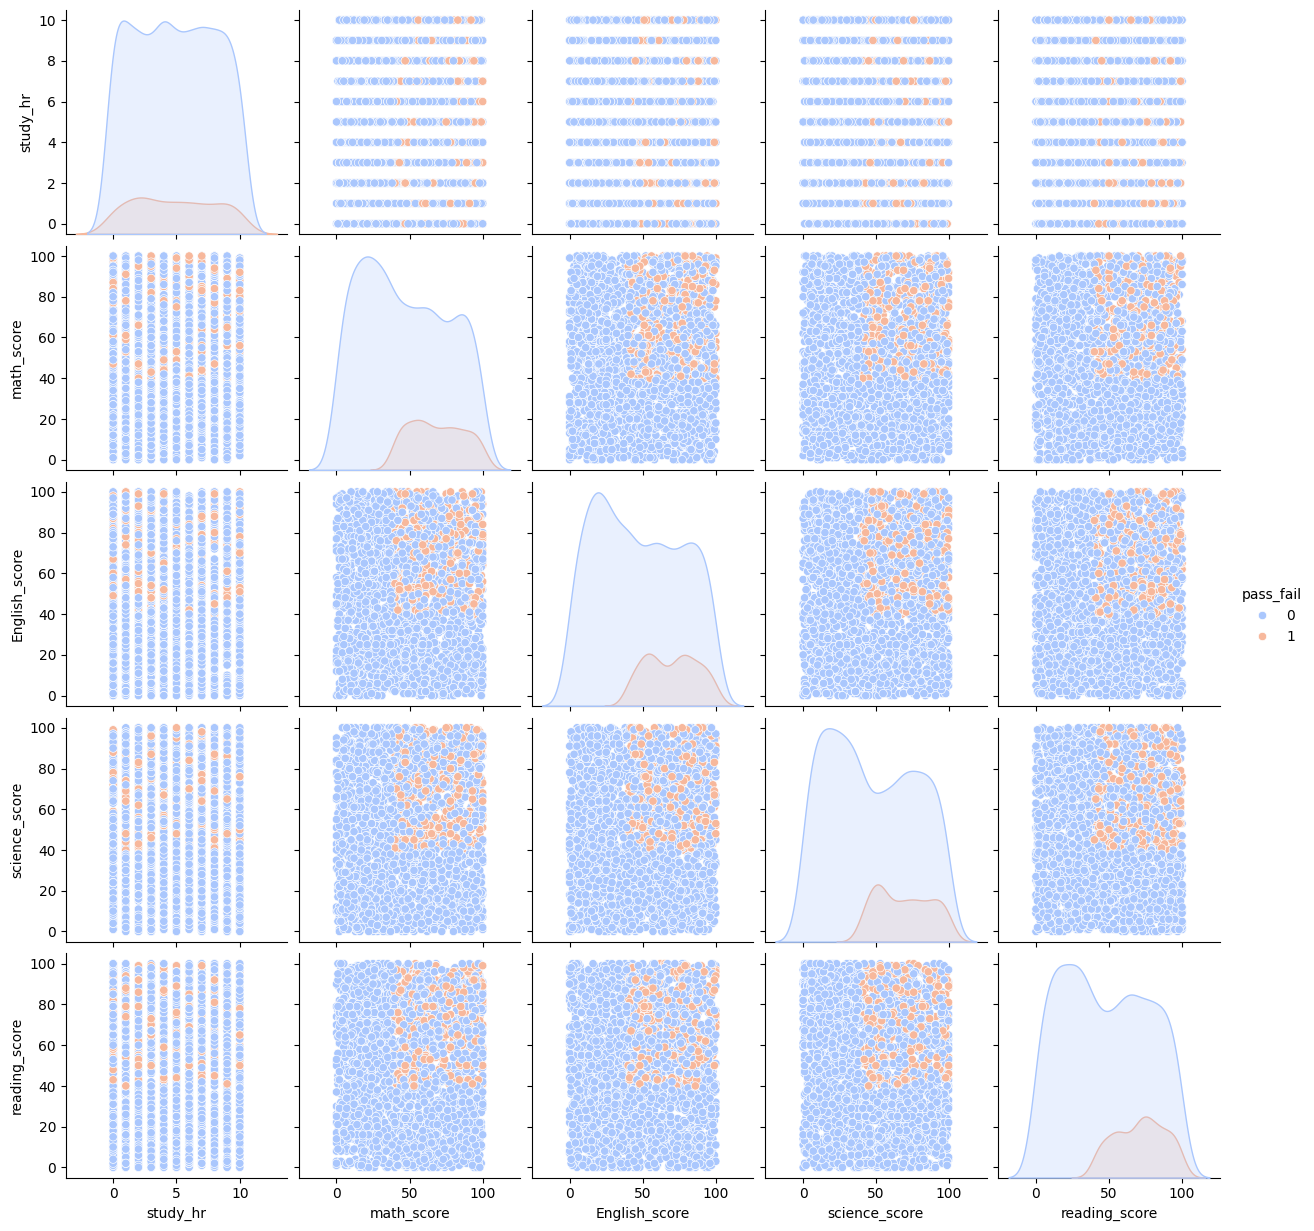

In [8]:
# Visualize data
sns.pairplot(df, hue='pass_fail', palette='coolwarm')
plt.show()

In [9]:
# Split data into train and test sets
X = df[['study_hr', 'math_score','English_score','science_score','reading_score']]
y = df['pass_fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [14]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.90
Confusion Matrix:
 [[418  11]
 [ 37  34]]


## Feature Engineering & Model Tuning
### we will create a feature that combines scores of all subject as total_score

In [16]:
df = pd.DataFrame(df)

# Feature Engineering: Create total_score
df['total_score'] = (
    df['math_score'] +
    df['English_score'] +
    df['science_score'] +
    df['reading_score'])

In [18]:
print(df.head())

   study_hr  math_score  English_score  science_score  reading_score  \
0         6          35             74             65             65   
1         3          67             58             99             78   
2        10          77             20             77             85   
3         7          40             53             15             73   
4         4          88             74             82             81   

   pass_fail  total_score  
0          0          239  
1          1          302  
2          0          259  
3          0          181  
4          1          325  


In [19]:
df.head()

,study_hr,math_score,English_score,science_score,reading_score,pass_fail,total_score
0,6,35,74,65,65,0,239
1,3,67,58,99,78,1,302
2,10,77,20,77,85,0,259
3,7,40,53,15,73,0,181
4,4,88,74,82,81,1,325


### Hyperparameter Tuning:
● Use GridSearchCV to optimize model parameters.

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [22]:
# Features and target variable
X = df[['math_score', 'English_score', 'science_score', 'reading_score', 'total_score']]
y = df['pass_fail']

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [27]:
# initializeGridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [28]:
# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [29]:
# Best parameters from GridSearchCV
print("Bestparameters_are: ", grid_search.best_params_)


Bestparameters_are:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
## Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [31]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       429
           1       1.00      0.96      0.98        71

    accuracy                           0.99       500
   macro avg       1.00      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.994


## Conclusion:
### Performance Improvement: 
The hyperparameter tuning in random forest classifier has led to a significant improvement in all metrics compared to logistics . The accuracy increased from 90% to 99%, and the precision, recall, and F1-scores also improved significantly. 

### Section 2: Fraud Detection with Decision Trees

In [34]:
# Load dataset
data = pd.read_csv("C:\\Users\\HP\\Downloads\\fraud_detection (1).xls")
data.head()

,transaction_id,account_no,amount,transaction_item,transaction_mode,is_fraud
0,TRAN_1,ACC_25795,1637.40,Utilities,offline,0
1,TRAN_2,ACC_10860,1643.49,Utilities,online,0
2,TRAN_3,ACC_86820,8145.93,Entertainment,offline,0
3,TRAN_4,ACC_64886,6652.31,Utilities,offline,0
4,TRAN_5,ACC_16265,5231.13,Utilities,offline,0


In [35]:
data.tail(10)

,transaction_id,account_no,amount,transaction_item,transaction_mode,is_fraud
990,TRAN_991,ACC_83698,2392.56,Utilities,offline,0
991,TRAN_992,ACC_15415,1423.35,Groceries,online,1
992,TRAN_993,ACC_46159,1214.73,Clothing,online,0
993,TRAN_994,ACC_53925,3033.45,Electronics,online,0
994,TRAN_995,ACC_15951,1011.36,Clothing,online,0
995,TRAN_996,ACC_97388,6921.92,Groceries,online,0
996,TRAN_997,ACC_18007,623.86,Travel,online,0
997,TRAN_998,ACC_51832,5094.71,Utilities,offline,0
998,TRAN_999,ACC_68596,9966.97,Utilities,online,0
999,TRAN_1000,ACC_40523,8139.89,Groceries,offline,0


In [37]:
data.describe()

,amount,is_fraud
count,1000.000000,1000.000000
mean,5023.090850,0.036000
std,2920.162102,0.186383
min,47.320000,0.000000
25%,2367.420000,0.000000
50%,5111.040000,0.000000
75%,7506.740000,0.000000
max,9994.140000,1.000000


In [43]:
data.shape

(1000, 6)

In [42]:
data.dtypes

transaction_id       object
account_no           object
amount              float64
transaction_item     object
transaction_mode     object
is_fraud              int64
dtype: object

In [44]:
data.isnull().sum()

transaction_id      0
account_no          0
amount              0
transaction_item    0
transaction_mode    0
is_fraud            0
dtype: int64

In [47]:
duplicated_val = data.duplicated().sum()
 


In [48]:
print(duplicated_val)

0


In [50]:
##Convert Categorical Variables using Label Encoding
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [52]:
# Convert 'transaction_item' and 'transaction_mode' to numerical values
data['transaction_item'] = label_encoder.fit_transform(data['transaction_item'])
data['transaction_mode'] = label_encoder.fit_transform(data['transaction_mode'])


In [54]:
data.head()

,transaction_id,account_no,amount,transaction_item,transaction_mode,is_fraud
0,TRAN_1,ACC_25795,1637.40,5,0,0
1,TRAN_2,ACC_10860,1643.49,5,1,0
2,TRAN_3,ACC_86820,8145.93,2,0,0
3,TRAN_4,ACC_64886,6652.31,5,0,0
4,TRAN_5,ACC_16265,5231.13,5,0,0


### Train a Decision Tree Classifier

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
## Split the dataset into training and testing sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
### Train a Decision treecClassifier
data_classifier = DecisionTreeClassifier(random_state=42)
data_classifier.fit(X_Train, y_Train)


DecisionTreeClassifier(random_state=42)

In [80]:
y_Pred = data_classifier.predict(X_Test)

In [81]:
print(y_Pred)

[0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 0 0 0 

In [82]:
print("Confusion_matrix:\n",confusion_matrix(y_Test, y_Pred))


Confusion_matrix:
 [[427   2]
 [  6  65]]


In [83]:
print('classification_report:\n',classification_report(y_Test, y_Pred))

classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       429
           1       0.97      0.92      0.94        71

    accuracy                           0.98       500
   macro avg       0.98      0.96      0.97       500
weighted avg       0.98      0.98      0.98       500



In [85]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.98


### Inference:
Based on the classification report we cn see tate Decision Tree model shows high precision and recall for class 0 (non-fraudulent transactions) and reasonably good performance for class 1 (fraudulent transactions).  


### Recommendations for Improving Fraud Detection Accuracy:
1. Feature Engineering: Create new and interaction features to enhance model input
2. Data Balancing: Use SMOTE to balance classes.
3. Model Selection: Experiment with Random Forest, XGBoost, andensembling methods.
4. Hyperparameter Tuning:to Optimize using Grid Search and k-fold cross-validation.
5. Anomaly Detection: Implement unsupervised methods like Isolation Forest.
6. User Behavior Analytics: Developing a profiles and use contextual features.
7. Continuous Monitoring: Real-time transaction analysis and regular model updation.
8. Threshold Adjustment: Optimize decision thresholds based on business goals.
9. Focus on Metrics: Prioritize precision, recall, and F1-score over accuracy.
### .................................    ....................................    ................................    .....................................